In [1]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns

In [104]:
ghg_year = pd.read_csv('GHG_by_year.csv')
ghg_year.drop(columns = 'Unnamed: 0', inplace = True)

In [105]:
ghg_year.head()

,Country,Year,Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)
0,Australia,1990,503.7846
1,Australia,1991,495.9580
2,Australia,1992,495.6116
3,Australia,1993,497.0890
4,Australia,1994,504.3664


In [106]:
ds_pivot = ghg_year.pivot(index='Year', columns='Country', values='Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)')

ds_pivot.columns = [x for x in ds_pivot.columns.values]
ds_pivot.head()

,Australia,Canada,China,Costa Rica,Egypt,France,India,Nigeria,South Africa,Ukraine
Year,,,,,,,,,,
1990,503.7846,681.9262,3218.4454,14.4554,123.7066,496.8353,1212.0206,385.7587,321.7321,NaN
1991,495.9580,602.9798,3158.9492,14.7035,127.7401,505.8161,1248.4708,391.7885,315.7579,NaN
1992,495.6116,617.5682,3306.6532,15.7955,131.9641,488.3584,1287.5430,403.3725,311.3492,751.2620
1993,497.0890,620.0533,3525.6052,15.8532,133.6810,468.1697,1319.9309,402.9772,318.8895,602.6213
1994,504.3664,640.2493,3691.7186,16.2640,127.9705,465.4080,1370.3745,400.6896,325.0547,510.9934


In [107]:
ds_pivot.fillna(0, inplace = True)

In [108]:
### There is diference between the Country Total GHG Emissions 

# NUll Hypotesis : Do difference existe between the GHG Emissions between countries 
# significance leve = 0.05

f_oneway(ds_pivot['Australia'],ds_pivot['Canada'],ds_pivot['China'],ds_pivot['Costa Rica'],ds_pivot['Egypt'],ds_pivot['France'],ds_pivot['India'], ds_pivot['Nigeria'],ds_pivot['South Africa'], ds_pivot['Ukraine'])



F_onewayResult(statistic=107.57177748071125, pvalue=1.708568386547803e-75)

In [109]:
ds_pivot.describe()

,Australia,Canada,China,Costa Rica,Egypt,France,India,Nigeria,South Africa,Ukraine
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,580.502165,788.377822,5809.622030,9.530283,194.149570,466.916157,1832.358609,411.394017,385.152452,384.111404
std,63.292907,134.124996,2469.035906,6.211007,57.718641,25.861304,505.110782,93.642055,51.545769,152.460064
min,495.611600,602.979800,3158.949200,0.000000,123.706600,426.341900,1212.020600,0.000000,311.349200,0.000000
25%,512.384150,667.937150,4051.379200,4.002900,139.925700,440.193350,1470.267900,403.270650,349.381300,364.794600
50%,597.587800,796.019300,4504.520800,5.711200,181.348200,469.982700,1669.641400,420.355700,371.350500,389.639900
75%,627.510400,867.570500,7938.454200,15.824350,247.865100,488.633550,2150.335550,455.284950,425.324350,408.569250
max,685.052900,1002.776000,10684.286600,16.467600,287.973400,505.816100,2887.083900,474.676400,467.942100,751.262000


In [110]:
ds_pivot.drop(columns = ['China', 'India', 'Canada'], inplace = True)

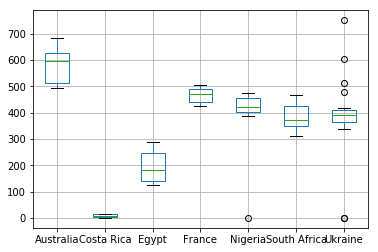

In [111]:
ds_pivot.boxplot()

In [113]:
f_oneway(ds_pivot['Australia'],ds_pivot['Costa Rica'],ds_pivot['Egypt'],ds_pivot['France'], ds_pivot['Nigeria'],ds_pivot['South Africa'], ds_pivot['Ukraine'])



F_onewayResult(statistic=133.8884591388777, pvalue=1.721122503971197e-58)

In [20]:
import matplotlib.pyplot as plt

In [82]:
ghg_year

,Country,Year,Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)
0,Australia,1990,503.7846
1,Australia,1991,495.9580
2,Australia,1992,495.6116
3,Australia,1993,497.0890
4,Australia,1994,504.3664
...,...,...,...
221,Ukraine,2008,393.4963
222,Ukraine,2009,336.1029
223,Ukraine,2010,355.3193
224,Ukraine,2011,371.4599


Country
Australia       AxesSubplot(0.125,0.125;0.775x0.755)
Canada          AxesSubplot(0.125,0.125;0.775x0.755)
China           AxesSubplot(0.125,0.125;0.775x0.755)
Costa Rica      AxesSubplot(0.125,0.125;0.775x0.755)
Egypt           AxesSubplot(0.125,0.125;0.775x0.755)
France          AxesSubplot(0.125,0.125;0.775x0.755)
India           AxesSubplot(0.125,0.125;0.775x0.755)
Nigeria         AxesSubplot(0.125,0.125;0.775x0.755)
South Africa    AxesSubplot(0.125,0.125;0.775x0.755)
Ukraine         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

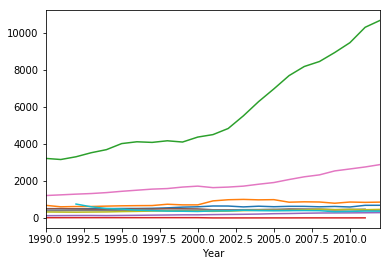

In [116]:
fig, ax = plt.subplots()

ghg_year.groupby('Country').plot(x='Year', y='Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)', ax=ax, legend=False)



In [70]:
ghg_year

,Country,Year,Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)
0,Australia,1990,503.7846
1,Australia,1991,495.9580
2,Australia,1992,495.6116
3,Australia,1993,497.0890
4,Australia,1994,504.3664
...,...,...,...
221,Ukraine,2008,393.4963
222,Ukraine,2009,336.1029
223,Ukraine,2010,355.3193
224,Ukraine,2011,371.4599


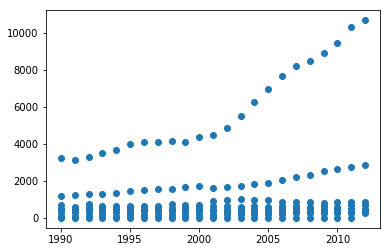

In [73]:
plt.scatter(ghg_year['Year'],ghg_year['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)'])